In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../Data/raw/emotions.csv')
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [5]:
df.shape

(2132, 2549)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [7]:
df.describe()

# mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean      0.025378     0.052282     0.301655     0.036793     0.083567  ...   
std      17.981796     8.509174    68.098894    17.010031    18.935378  ...   
min    -218.000000  -255.000000 -1360.000000  -203.000000  -553.000000  ...   
25%      -3.105000    -1.340000    -4.002500    -2.905000    -2.622500  ...   
50%      -0.044600     0.132000     0.957500    -0.099750     0.146500  ...   
75%       2.920000     1.540000     6.735000     2.535000     2.870000  ...   
max     402.000000   257.000000  1150.000000   349.000000   444.000000  ...   

         fft_740_b    fft_741_b    fft_742_b    fft_743_b    fft_744_b  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean    -22.938971   104.946111   -51.973647   -51.973647   104.946111   
std     298.034311   212.532721   112.160233   112.160233   212.532721   
min   -1180.000000  -921.000000  -504.000000  -504.000000  -921.000000   
25%    -106.500000    -8.365000   -92.900000   -92.900000    -8.365000   
50%      83.850000    12.150000   -21.800000   -21.800000    12.150000   
75%     154.000000   177.000000    12.025000    12.025000   177.000000   
max    1070.000000   843.000000  1490.000000  1490.000000   843.000000   

         fft_745_b    fft_746_b    fft_747_b    fft_748_b    fft_749_b  
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  
mean     -6.934144    95.104886   -49.061255   -49.061255    95.104886  
std     281.040552   203.194976   106.486317   106.486317   203.194976  
min   -1160.000000 -1010.000000  -521.000000  -521.000000 -1010.000000  
25%    -102.500000    -8.837500   -87.150000   -87.150000    -8.837500  
50%      89.700000    13.400000   -24.100000   -24.100000    13.400000  
75%     153.000000   149.250000    10.925000    10.925000   149.250000  
max    1180.000000   888.000000  1670.000000  1670.000000   888.000000  

[8 rows x 2548 columns]

In [8]:
df.isnull()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          False     False     False     False     False       False   
1          False     False     False     False     False       False   
2          False     False     False     False     False       False   
3          False     False     False     False     False       False   
4          False     False     False     False     False       False   
...          ...       ...       ...       ...       ...         ...   
2127       False     False     False     False     False       False   
2128       False     False     False     False     False       False   
2129       False     False     False     False     False       False   
2130       False     False     False     False     False       False   
2131       False     False     False     False     False       False   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          False       False       False       False  ...      False   
1          False       False       False       False  ...      False   
2          False       False       False       False  ...      False   
3          False       False       False       False  ...      False   
4          False       False       False       False  ...      False   
...          ...         ...         ...         ...  ...        ...   
2127       False       False       False       False  ...      False   
2128       False       False       False       False  ...      False   
2129       False       False       False       False  ...      False   
2130       False       False       False       False  ...      False   
2131       False       False       False       False  ...      False   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
0         False      False      False      False      False      False   
1         False      False      False      False      False      False   
2         False      False      False      False      False      False   
3         False      False      False      False      False      False   
4         False      False      False      False      False      False   
...         ...        ...        ...        ...        ...        ...   
2127      False      False      False      False      False      False   
2128      False      False      False      False      False      False   
2129      False      False      False      False      False      False   
2130      False      False      False      False      False      False   
2131      False      False      False      False      False      False   

      fft_748_b  fft_749_b  label  
0         False      False  False  
1         False      False  False  
2         False      False  False  
3         False      False  False  
4         False      False  False  
...         ...        ...    ...  
2127      False      False  False  
2128      False      False  False  
2129      False      False  False  
2130      False      False  False  
2131      False      False  False  

[2132 rows x 2549 columns]

In [9]:
df.isna().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [10]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

visulization

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


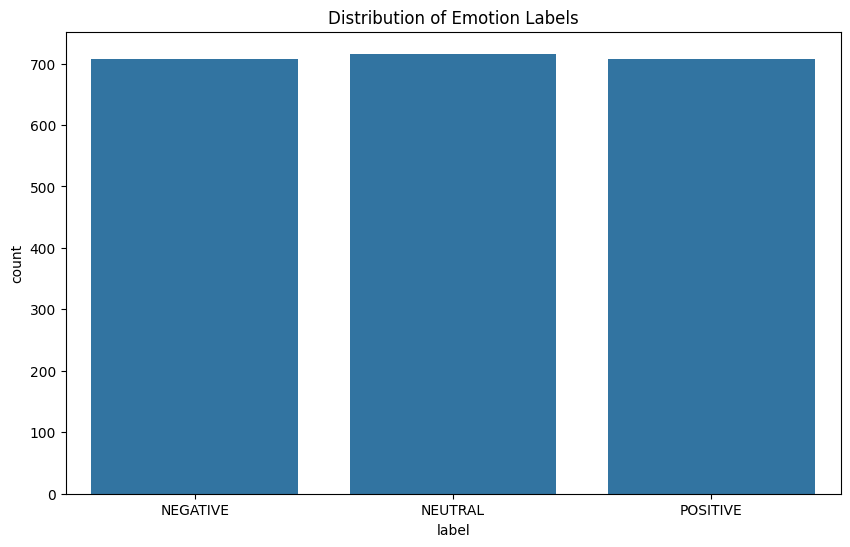

In [11]:
print(df['label'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Emotion Labels')
plt.show()

In [12]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

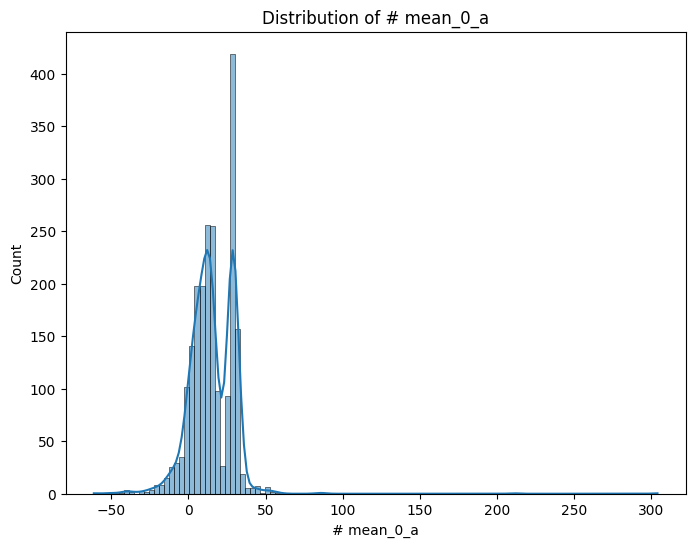

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['# mean_0_a'], kde=True)
plt.title('Distribution of # mean_0_a')
plt.show()

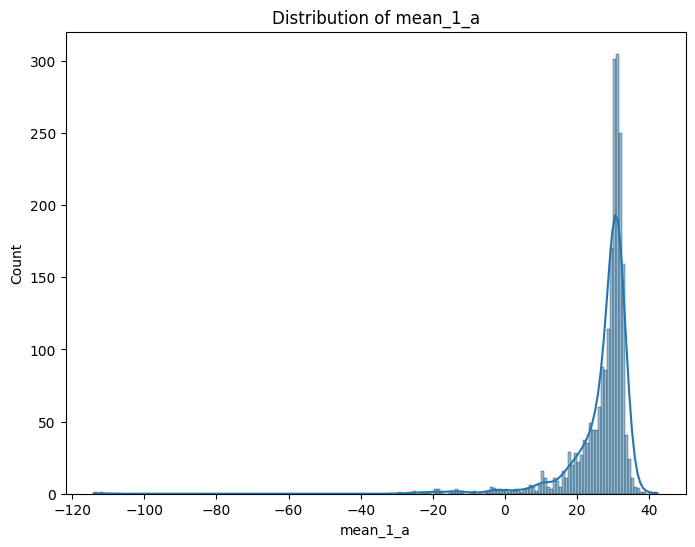

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['mean_1_a'], kde=True)
plt.title('Distribution of mean_1_a')
plt.show()

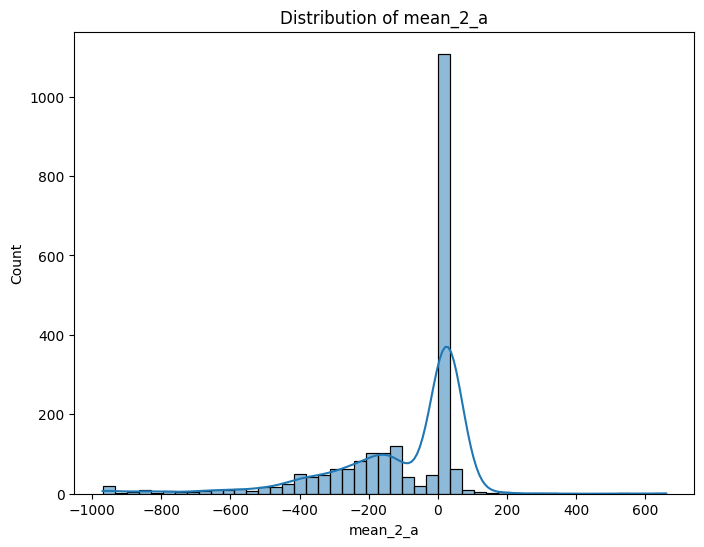

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['mean_2_a'], kde=True)
plt.title('Distribution of mean_2_a')
plt.show()

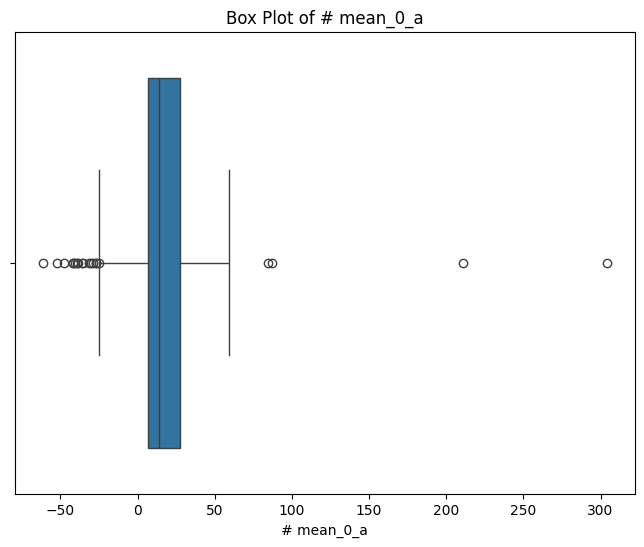

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['# mean_0_a'])
plt.title('Box Plot of # mean_0_a')
plt.show()

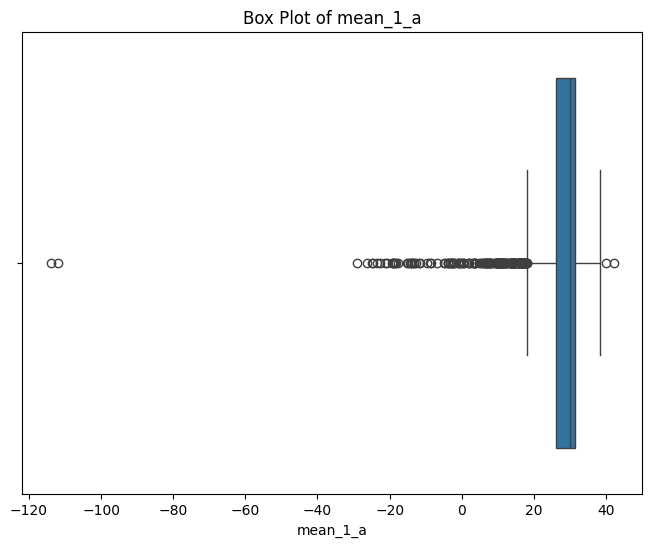

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['mean_1_a'])
plt.title('Box Plot of mean_1_a')
plt.show()

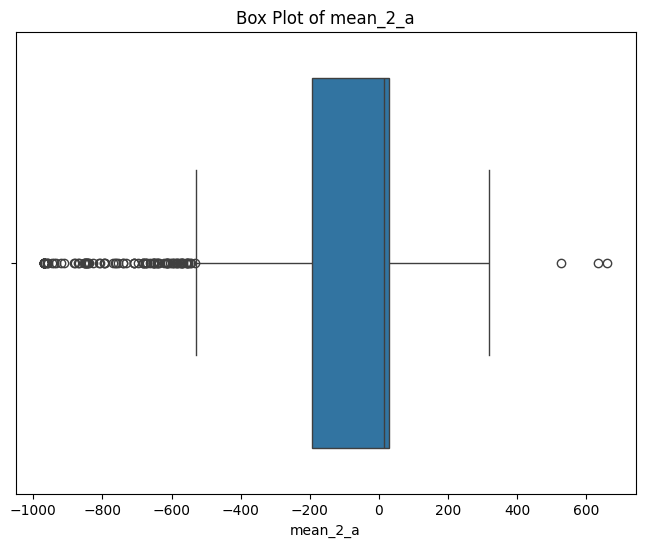

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['mean_2_a'])
plt.title('Box Plot of mean_2_a')
plt.show()

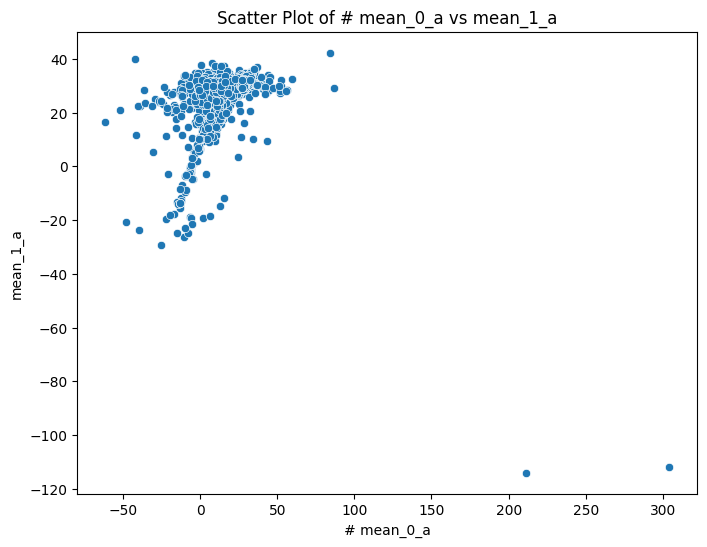

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['# mean_0_a'], y=df['mean_1_a'])
plt.title('Scatter Plot of # mean_0_a vs mean_1_a')
plt.show()

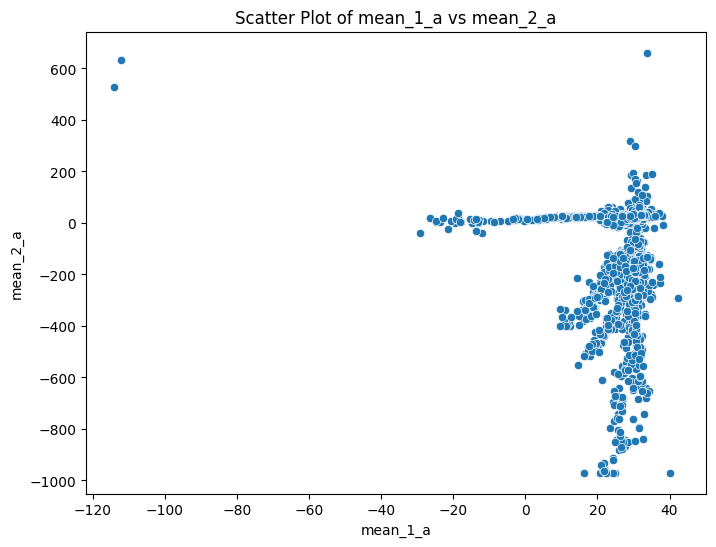

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['mean_1_a'], y=df['mean_2_a'])
plt.title('Scatter Plot of mean_1_a vs mean_2_a')
plt.show()

In [21]:
numerical_df = df.drop('label', axis=1)
corr_matrix = numerical_df.corr()
corr_matrix

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
# mean_0_a    1.000000  0.176578  0.429810  0.582697  0.178432   -0.000665   
mean_1_a      0.176578  1.000000 -0.007202  0.571530  0.385041   -0.088608   
mean_2_a      0.429810 -0.007202  1.000000  0.081567 -0.095696    0.015122   
mean_3_a      0.582697  0.571530  0.081567  1.000000  0.220842   -0.117748   
mean_4_a      0.178432  0.385041 -0.095696  0.220842  1.000000   -0.017196   
...                ...       ...       ...       ...       ...         ...   
fft_745_b     0.268983  0.153244  0.674195  0.103294 -0.039620    0.024944   
fft_746_b    -0.220566 -0.096173 -0.728296 -0.061376  0.056452    0.002976   
fft_747_b     0.196653  0.069532  0.565044  0.051216 -0.016933   -0.017169   
fft_748_b     0.196653  0.069532  0.565044  0.051216 -0.016933   -0.017169   
fft_749_b    -0.220566 -0.096173 -0.728296 -0.061376  0.056452    0.002976   

            mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  \
# mean_0_a    0.105961   -0.061046    0.135370    0.008472  ...   0.301672   
mean_1_a     -0.007586   -0.050463   -0.119391   -0.017197  ...   0.130717   
mean_2_a      0.014605   -0.004320    0.055625   -0.003564  ...   0.699461   
mean_3_a      0.124462   -0.175592   -0.001782    0.017110  ...   0.133720   
mean_4_a     -0.007570    0.025546   -0.033443   -0.020361  ...  -0.043602   
...                ...         ...         ...         ...  ...        ...   
fft_745_b    -0.043387    0.098389   -0.022019   -0.003329  ...   0.458558   
fft_746_b    -0.001477   -0.061713    0.005671   -0.005395  ...  -0.493145   
fft_747_b     0.003350    0.149472   -0.040408    0.003422  ...   0.375438   
fft_748_b     0.003350    0.149472   -0.040408    0.003422  ...   0.375438   
fft_749_b    -0.001477   -0.061713    0.005671   -0.005395  ...  -0.493145   

            fft_741_b  fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  \
# mean_0_a  -0.245671   0.204764   0.204764  -0.245671   0.268983  -0.220566   
mean_1_a    -0.047208   0.002549   0.002549  -0.047208   0.153244  -0.096173   
mean_2_a    -0.742275   0.622567   0.622567  -0.742275   0.674195  -0.728296   
mean_3_a    -0.067460   0.048202   0.048202  -0.067460   0.103294  -0.061376   
mean_4_a     0.069458  -0.090163  -0.090163   0.069458  -0.039620   0.056452   
...               ...        ...        ...        ...        ...        ...   
fft_745_b   -0.431711   0.415781   0.415781  -0.431711   1.000000  -0.938696   
fft_746_b    0.531019  -0.459876  -0.459876   0.531019  -0.938696   1.000000   
fft_747_b   -0.355117   0.499272   0.499272  -0.355117   0.834622  -0.815108   
fft_748_b   -0.355117   0.499272   0.499272  -0.355117   0.834622  -0.815108   
fft_749_b    0.531019  -0.459876  -0.459876   0.531019  -0.938696   1.000000   

            fft_747_b  fft_748_b  fft_749_b  
# mean_0_a   0.196653   0.196653  -0.220566  
mean_1_a     0.069532   0.069532  -0.096173  
mean_2_a     0.565044   0.565044  -0.728296  
mean_3_a     0.051216   0.051216  -0.061376  
mean_4_a    -0.016933  -0.016933   0.056452  
...               ...        ...        ...  
fft_745_b    0.834622   0.834622  -0.938696  
fft_746_b   -0.815108  -0.815108   1.000000  
fft_747_b    1.000000   1.000000  -0.815108  
fft_748_b    1.000000   1.000000  -0.815108  
fft_749_b   -0.815108  -0.815108   1.000000  

[2548 rows x 2548 columns]

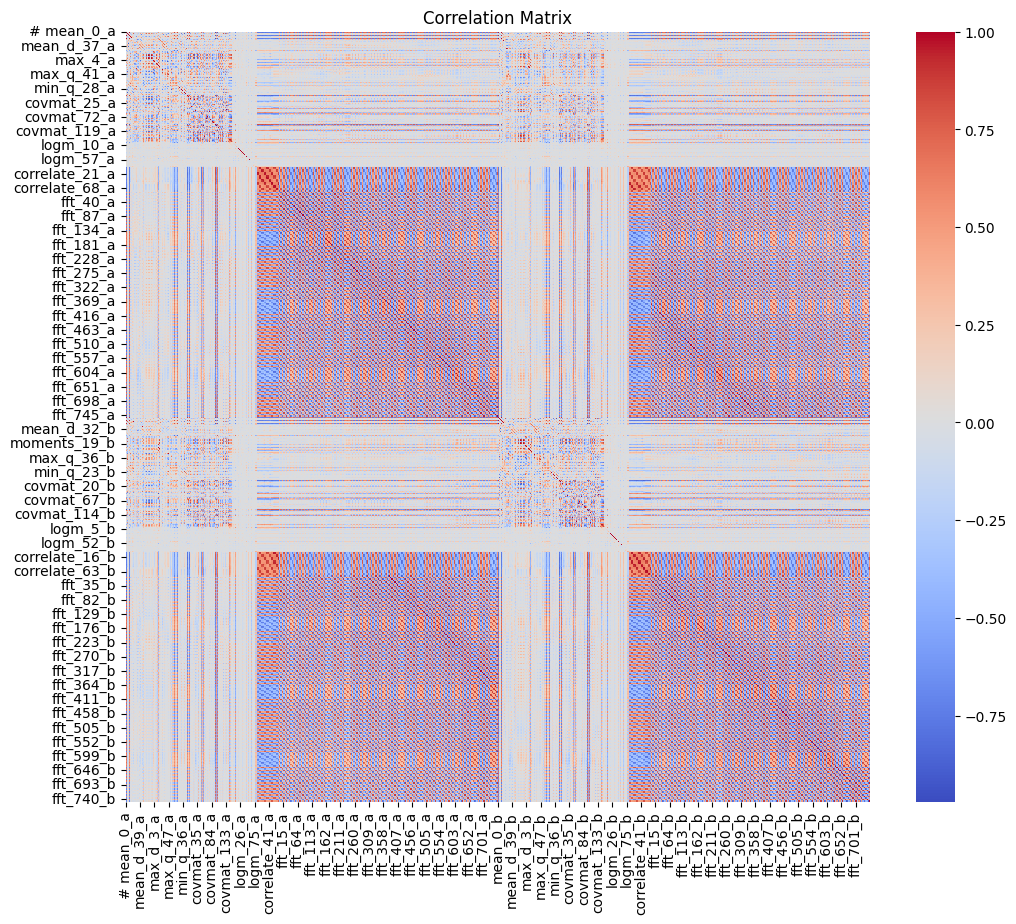

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

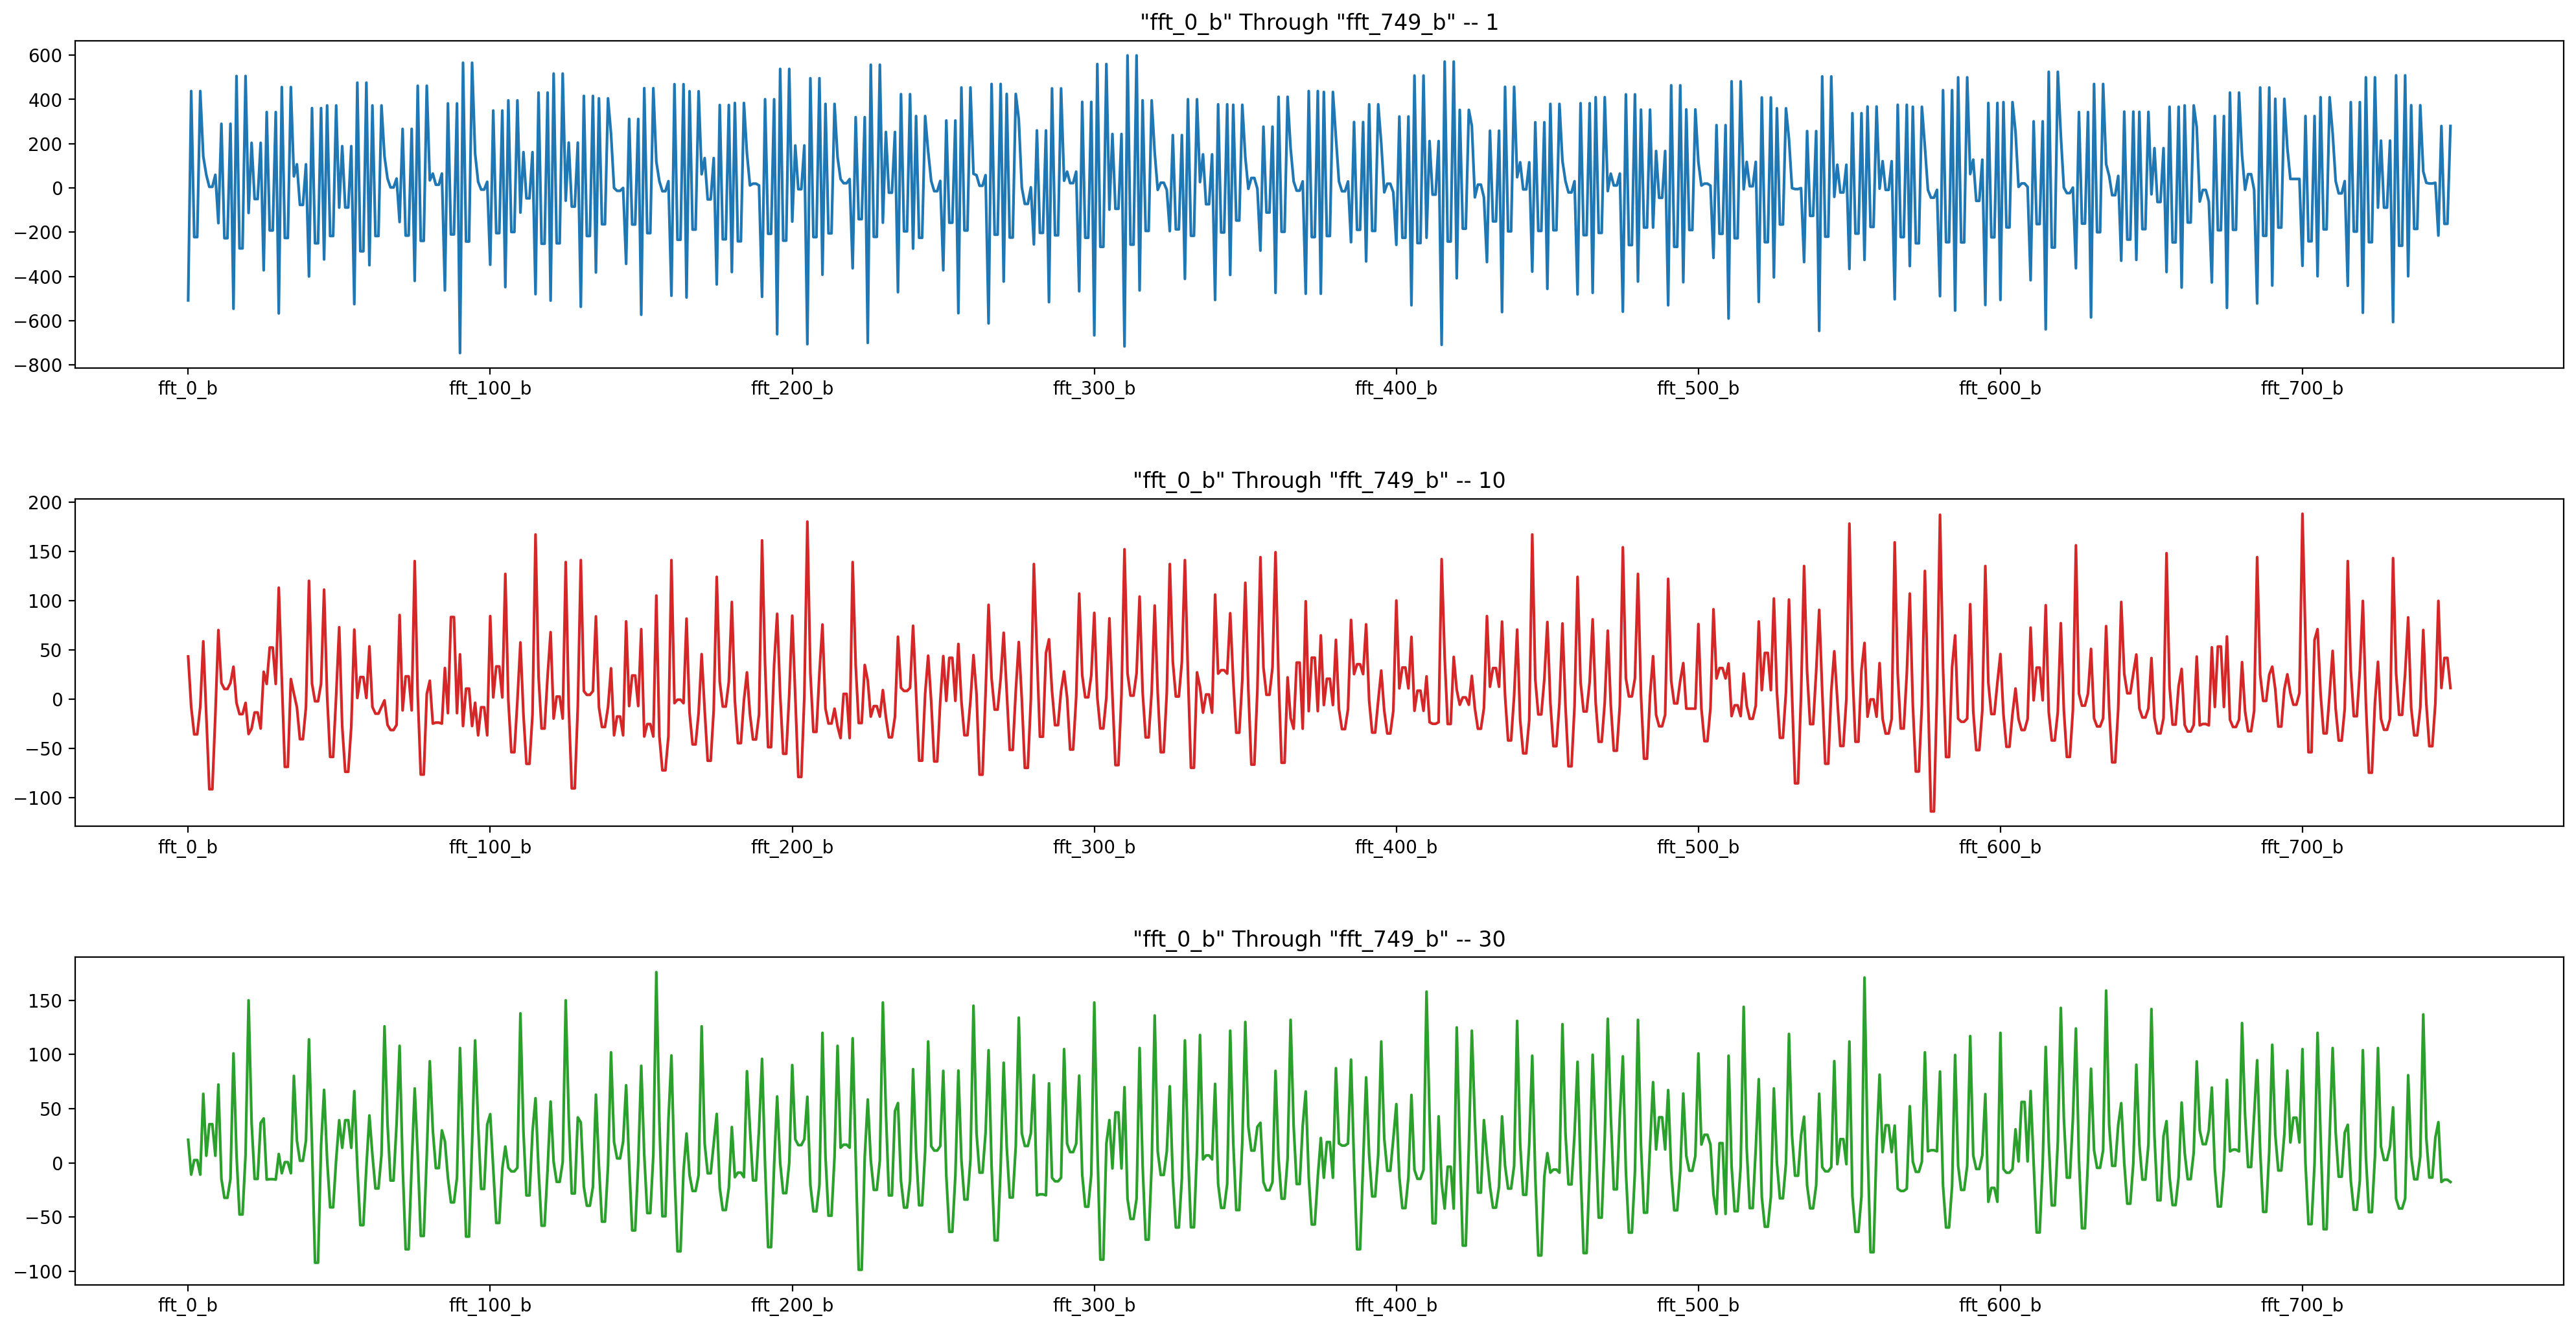

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

df.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
df.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
df.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

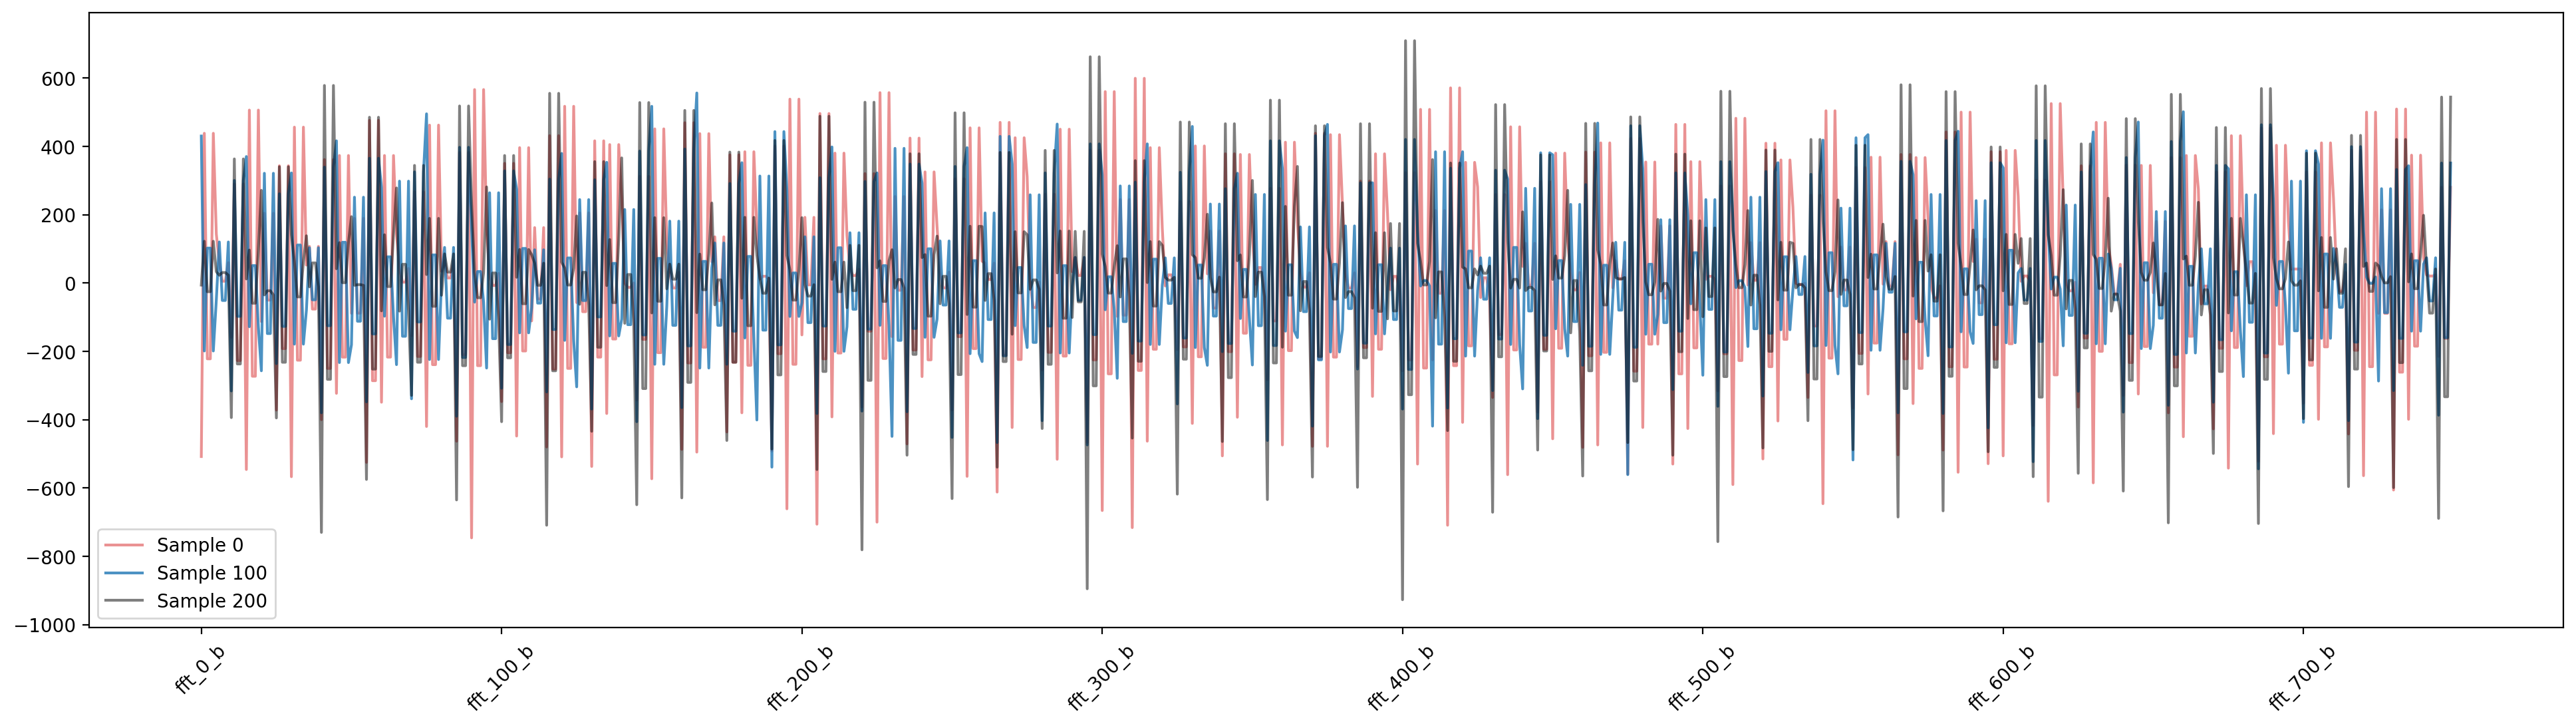

In [24]:
plt.figure(dpi=200, figsize=(24, 6))
plt.plot(df.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(df.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(df.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)
plt.xticks(np.arange(0, len(df.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'NEGATIVE': np.int64(0), 'NEUTRAL': np.int64(1), 'POSITIVE': np.int64(2)}


In [26]:
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00      0  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57      1  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00      2  
3      299.0      132.0     -12.40       9.53       9.53     -12.40      2  
4       12.0      119.0     -17.60      23.90      23.90     -17.60      1  

[5 rows x 2549 columns]

In [32]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

mi_scores = mutual_info_classif(df.drop('label', axis=1), df['label'])
selector = SelectKBest(mutual_info_classif, k=100)
X_selected = selector.fit_transform(df.drop('label', axis=1), df['label'])

print(f"Selected Features: {selector.get_support(indices=True)}")


Selected Features: [   0    2    3   12   13   17   18   22   23   25   27   28   60   62
   75   77   87  150  152  160  162  165  167  170  172  175  177  210
  211  213  214  218  219  222  223  225  230  246  247  258  279  306
  307  314  318  323  327  354  366  374 1274 1276 1277 1286 1287 1291
 1292 1296 1297 1299 1301 1302 1334 1336 1349 1351 1361 1424 1426 1434
 1436 1439 1441 1444 1446 1449 1451 1484 1485 1487 1488 1492 1493 1496
 1497 1499 1504 1520 1521 1532 1553 1580 1581 1588 1592 1597 1601 1628
 1640 1648]


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_pca = pca.fit_transform(df.drop('label', axis=1))

print(f"Variance Ratio: {pca.explained_variance_ratio_}")

Variance Ratio: [8.82765533e-01 1.16076537e-01 5.26083101e-04 2.77811581e-04
 2.12753902e-04 1.38628350e-04 2.21733396e-06 4.29220145e-07
 3.90195902e-09 1.59920528e-09 8.84029237e-10 3.78700826e-11
 3.70402734e-11 4.45737491e-12 5.22086353e-13 6.81740818e-14
 4.14558052e-15 7.34762119e-16 2.65457779e-16 1.48885362e-16
 6.99729995e-18 1.55813789e-18 8.21897968e-20 2.56456127e-20
 1.97786773e-20 1.00606915e-20 2.49945547e-21 1.93449119e-21
 8.00128942e-22 2.07370374e-22 1.71004660e-22 3.89120357e-23
 3.69915792e-23 1.37746658e-24 6.72935997e-25 5.77396956e-25
 5.40857843e-25 5.22994640e-25 4.90073494e-25 4.34700409e-25
 3.98951420e-25 3.74097562e-25 3.10740608e-25 2.68650335e-25
 2.50013110e-25 2.33178127e-25 2.25079121e-25 2.10572240e-25
 2.09862692e-25 2.05604587e-25 1.97525852e-25 1.84449718e-25
 1.80693925e-25 1.67502801e-25 1.62823049e-25 1.59521654e-25
 1.53600310e-25 1.48484019e-25 1.39926540e-25 1.32270013e-25
 1.31345060e-25 1.29100223e-25 1.26280156e-25 1.26074188e-25
 1.22024

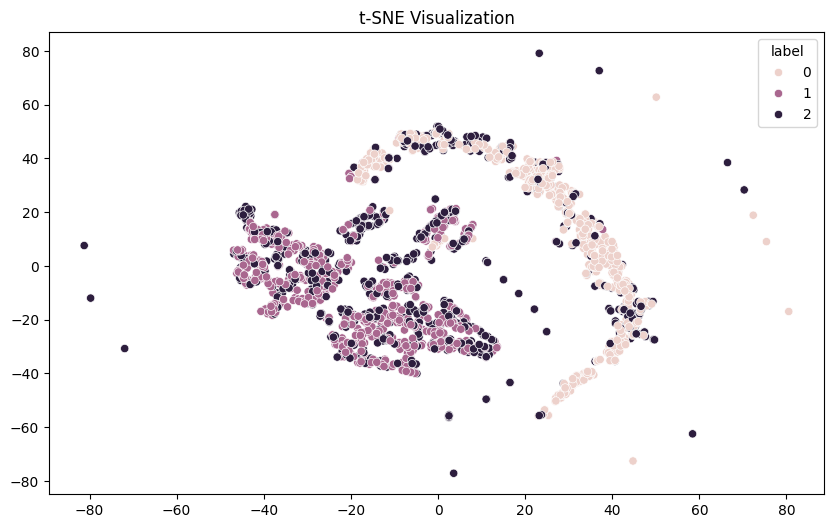

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df.drop('label', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['label'])
plt.title('t-SNE Visualization')
plt.show()
